Item 0: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 1: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 2: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 3: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 4: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 5: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 6: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 7: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 8: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 9: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 10: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 11: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 12: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
Item 13: w0 = -0.002632, w1 = 0.029342, w2 = -0.018421, Loss = 0.682391
It

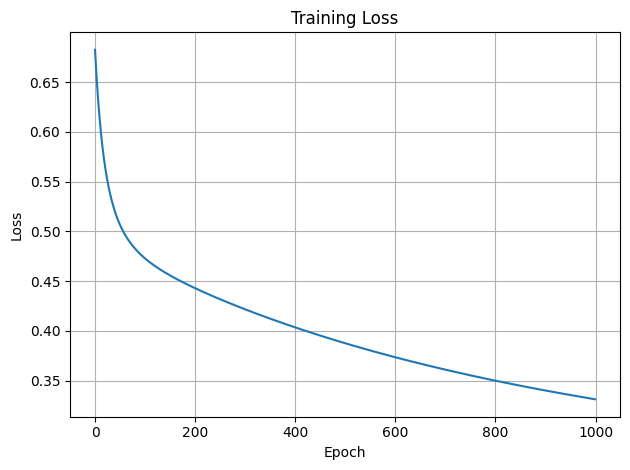

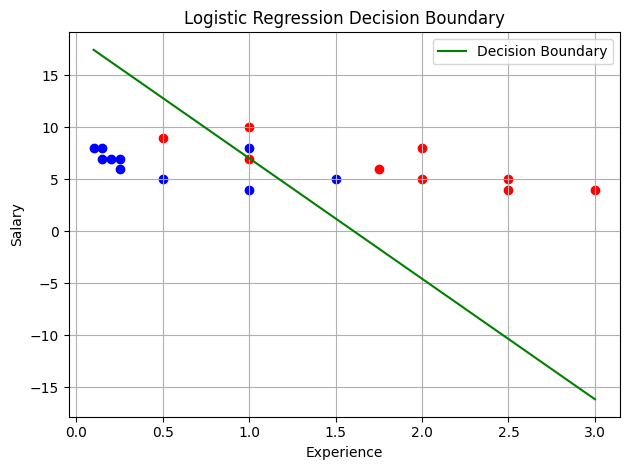

In [10]:
import math
import matplotlib.pyplot as plt

def load_csv(filename):
    X, y = [], []
    with open(filename, 'r') as f:
        next(f)
        for line in f:
            parts = line.strip().split(',')
            if len(parts) != 3:
                continue
            exp, sal, label = float(parts[0]), float(parts[1]), int(parts[2])
            X.append([1, exp, sal]) 
            y.append(label)
    return X, y

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def predict(x, w):
    z = sum(x[i] * w[i] for i in range(len(w)))
    return sigmoid(z)

def compute_loss(X, y, w):
    total_loss = 0
    for i in range(len(X)):
        y_hat = predict(X[i], w)
        total_loss += -(y[i] * math.log(y_hat + 1e-15) + (1 - y[i]) * math.log(1 - y_hat + 1e-15))
    return total_loss / len(X)

def compute_gradients(X, y, w):
    gradients = [0.0] * len(w)
    for i in range(len(X)):
        y_hat = predict(X[i], w)
        error = y_hat - y[i]
        for j in range(len(w)):
            gradients[j] += error * X[i][j]
    return gradients

def train(X, y, w, lr=0.5, epochs=100):
    losses = []
    for epoch in range(epochs):
        gradients = compute_gradients(X, y, w)
        
        for j in range(len(w)):
            w[j] -= lr * gradients[j] / len(X)
        
        loss = compute_loss(X, y, w)
        losses.append(loss)
        for i in range(len(X)):
            y_hat = predict(X[i], w)
            print(f"Item {i}: w0 = {w[0]:.6f}, w1 = {w[1]:.6f}, w2 = {w[2]:.6f}, Loss = {loss:.6f}")

    return w, losses

def plot_decision_boundary(X, y, w):
    for xi, yi in zip(X, y):
        color = 'red' if yi == 1 else 'blue'
        plt.scatter(xi[1], xi[2], color=color)

    x_vals = [min(x[1] for x in X), max(x[1] for x in X)]
    y_vals = [-(w[0] + w[1]*x) / w[2] for x in x_vals]
    plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.title('Logistic Regression Decision Boundary')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

X, y = load_csv("../loan2.csv")

w = [0.0, 0.0, 0.0]
w, losses = train(X, y, w, lr=0.1, epochs=1000)

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

plot_decision_boundary(X, y, w)


Focal loss

Epoch 0: Loss = 0.074590
Epoch 100: Loss = 0.057984
Epoch 200: Loss = 0.054248
Epoch 300: Loss = 0.052358
Epoch 400: Loss = 0.050936
Epoch 500: Loss = 0.049682
Epoch 600: Loss = 0.048519
Epoch 700: Loss = 0.047425
Epoch 800: Loss = 0.046392
Epoch 900: Loss = 0.045417
Epoch 999: Loss = 0.044507


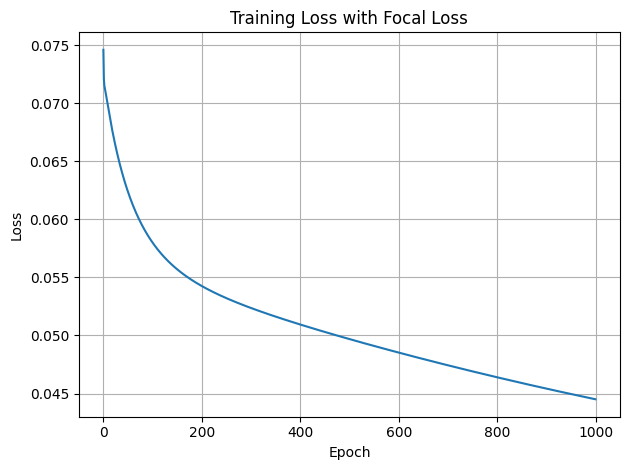

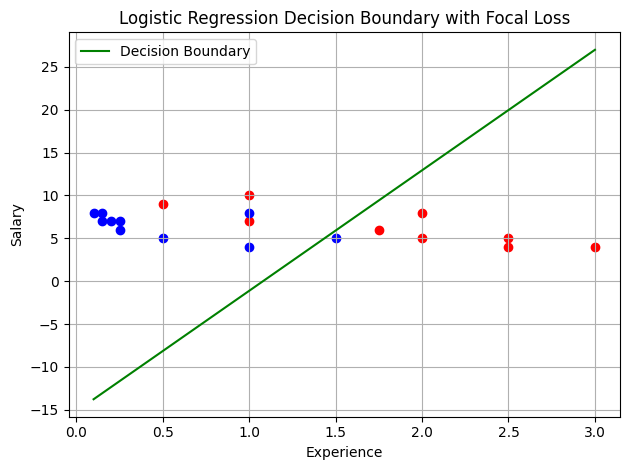

In [11]:
import math
import matplotlib.pyplot as plt

def load_csv(filename):
    X, y = [], []
    with open(filename, 'r') as f:
        next(f)  # Skip header
        for line in f:
            parts = line.strip().split(',')
            if len(parts) != 3:
                continue
            exp, sal, label = float(parts[0]), float(parts[1]), int(parts[2])
            X.append([1, exp, sal])  # Add bias term
            y.append(label)
    return X, y

def sigmoid(z):
    return 1 / (1 + math.exp(-z))

def predict(x, w):
    z = sum(x[i] * w[i] for i in range(len(w)))
    return sigmoid(z), z  # Return both probability and raw logit

def compute_focal_loss(X, y, w, alpha=0.25, gamma=2.0):
    total_loss = 0
    for i in range(len(X)):
        y_hat, _ = predict(X[i], w)
        if y[i] == 1:
            focal_loss = -alpha * (1 - y_hat)**gamma * math.log(y_hat + 1e-15)
        else:
            focal_loss = -(1 - alpha) * y_hat**gamma * math.log(1 - y_hat + 1e-15)
        total_loss += focal_loss
    return total_loss / len(X)

def compute_gradients(X, y, w, alpha=0.25, gamma=2.0):
    gradients = [0.0] * len(w)
    for i in range(len(X)):
        y_hat, z = predict(X[i], w)
        y_i = y[i]
        pt = y_hat if y_i == 1 else 1 - y_hat
        alpha_t = alpha if y_i == 1 else 1 - alpha
        d_pt_dz = y_hat * (1 - y_hat) * (1 if y_i == 1 else -1)

        # Derivative of focal loss with respect to z
        term1 = gamma * (1 - pt)**(gamma - 1) * pt * math.log(pt + 1e-15)
        term2 = (1 - pt)**gamma * (1 / (pt + 1e-15))
        dFL_dz = alpha_t * d_pt_dz * (term1 - term2)

        for j in range(len(w)):
            gradients[j] += dFL_dz * X[i][j]

    return gradients

def train(X, y, w, lr=0.5, epochs=100, alpha=0.25, gamma=2.0):
    losses = []
    for epoch in range(epochs):
        gradients = compute_gradients(X, y, w, alpha, gamma)

        for j in range(len(w)):
            w[j] -= lr * gradients[j] / len(X)

        loss = compute_focal_loss(X, y, w, alpha, gamma)
        losses.append(loss)
        if epoch % 100 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}: Loss = {loss:.6f}")
    return w, losses

def plot_decision_boundary(X, y, w):
    for xi, yi in zip(X, y):
        color = 'red' if yi == 1 else 'blue'
        plt.scatter(xi[1], xi[2], color=color)

    x_vals = [min(x[1] for x in X), max(x[1] for x in X)]
    y_vals = [-(w[0] + w[1]*x) / w[2] for x in x_vals]
    plt.plot(x_vals, y_vals, color='green', label='Decision Boundary')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.title('Logistic Regression Decision Boundary with Focal Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Load data and train
X, y = load_csv("../loan2.csv")
w = [0.0, 0.0, 0.0]  # Initialize weights

w, losses = train(X, y, w, lr=0.1, epochs=1000, alpha=0.25, gamma=2.0)

# Plot loss
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss with Focal Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot decision boundary
plot_decision_boundary(X, y, w)
